***
## Import Packages

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<a id='Section 1'></a>
***
<a href='#Section 0'> Back to top </a>
## Problem 1. Working with Corners
***
###  For the images in folder Problem1:

### (1) Use Harris corner detector to find the corner responses for img1 and img2. Show the detected corners in both images in red color and draw a blue circle of radius 15 and thickness of 2 around the corner with the highest response in both images. Show the two images.


<font size="2"> <strong>Note:</strong> Problem provided by Prof Iyad Jaafer. </font> 



Text(0.5, 1.0, 'Thresholded Response2')

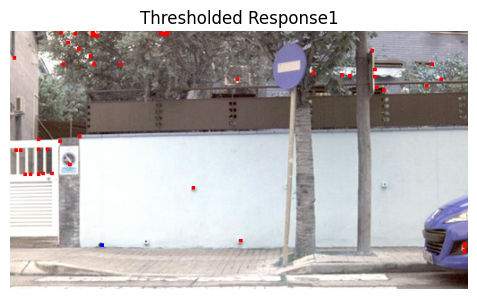

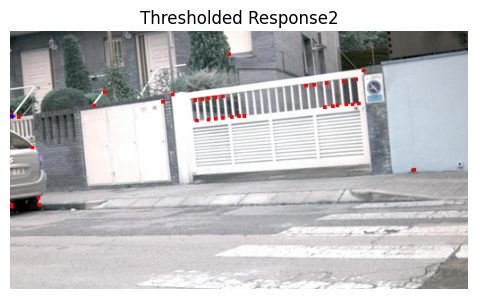

In [3]:
p1img1=cv2.imread('Problem1/img1.jpg')
p1img2=cv2.imread('Problem1/img2.jpg')

p1img1g = cv2.cvtColor(p1img1,cv2.COLOR_BGR2GRAY)
p1img1g=cv2.GaussianBlur(p1img1g,(5,5),0)
img1Corner= cv2.cornerHarris(p1img1g,2,3,0.04)

thresh1=0.1*img1Corner.max()
img1Corner[img1Corner<thresh1]=0


p1img2g = cv2.cvtColor(p1img2,cv2.COLOR_BGR2GRAY)
p1img2g=cv2.GaussianBlur(p1img2g,(5,5),0)
img2Corner= cv2.cornerHarris(p1img2g,2,3,0.04)

ksize = 5 # size of window to search
for x in range(ksize,img1Corner.shape[0]-ksize):
    for y in range(ksize,img1Corner.shape[1]-ksize):
        mx = img1Corner[x-ksize:x+ksize,y-ksize:y+ksize].max()
        if img1Corner[x,y] < mx:
            img1Corner[x,y] = 0 # supress 

        mx = img2Corner[x-ksize:x+ksize,y-ksize:y+ksize].max()
        if img2Corner[x,y] < mx:
            img2Corner[x,y] = 0 # supress 


thresh2=0.1*img2Corner.max()
img2Corner[img2Corner<thresh2]=0


mask1=np.copy(img1Corner)
mask1 = cv2.dilate(mask1,np.ones((4,4)))
im1show = np.copy(p1img1)
im1show[mask1!=0] = [255,0,0]
im1show[mask1==mask1.max()]=[0,0,255]

mask2=np.copy(img2Corner)
mask2 = cv2.dilate(mask2,np.ones((4,4)))
im2show = np.copy(p1img2)
im2show[mask2!=0] = [255,0,0]
im2show[mask2==mask2.max()]=[0,0,255]

plt.figure(figsize=(13,13))
plt.subplot(1,2,1)
plt.imshow(im1show)
plt.axis('off')
plt.title('Thresholded Response1',fontsize=12)

plt.figure(figsize=(13,13))
plt.subplot(1,2,1)
plt.imshow(im2show)
plt.axis('off')
plt.title('Thresholded Response2',fontsize=12)


### (2) For the corner with the highest response in img1, investigate whether you can find its best corresponding corner in img2 using the template matching funtion in OpenCV (cv2.matchTemplate). Your code should output the two images side by side with blue circle drawn around the corresponding two corners. Also, show the result of correlation and draw a circle around the point with highest correlation. 



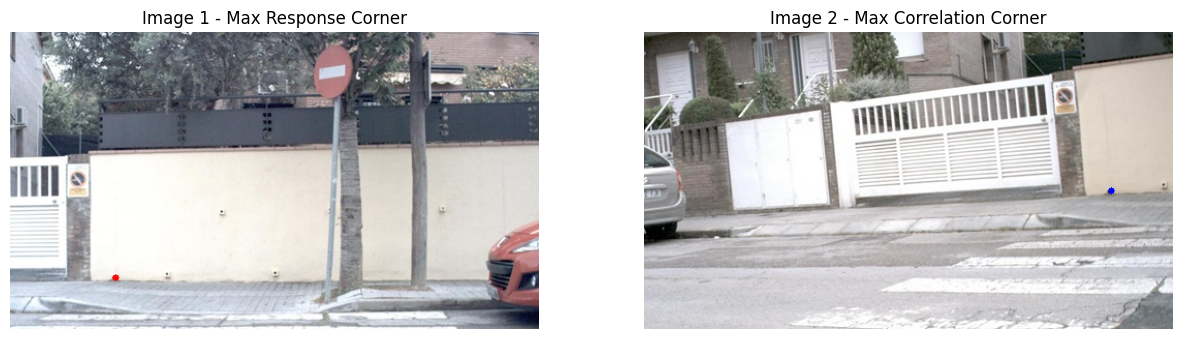

In [4]:

max_loc_img1 = np.unravel_index(np.argmax(img1Corner), img1Corner.shape)
template = p1img1[max_loc_img1[0] - 20 : max_loc_img1[0] + 20,
                  max_loc_img1[1] - 20 : max_loc_img1[1] + 20, :]


result = cv2.matchTemplate(p1img2, template, cv2.TM_CCOEFF_NORMED)


min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)


img1_result = np.copy(p1img1)
img2_result = np.copy(p1img2)

cv2.circle(img1_result, max_loc_img1[::-1], 3, (0, 0, 255), -1)
cv2.circle(img2_result, (max_loc[0] + 20, max_loc[1] + 20), 3, (255, 0, 0), -1)

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.imshow(img1_result[:, :, ::-1])
plt.axis("off")
plt.title('Image 1 - Max Response Corner')

plt.subplot(122)
plt.imshow(img2_result[:, :, ::-1])
plt.axis("off")
plt.title('Image 2 - Max Correlation Corner')


plt.show()



<a id='Section 2'></a>
***
<a href='#Section 0'> Back to top </a>
## Problem 2. Fitting ellipses
***
### The images in folder Problem2 are noisy color images for solid ellipses with orientation along the y-axis such that their centers are at (xc,200). The length of the major and minor axes of these ellipses are 340 and 40, respectively. 

### It is required to use what you have learnet so far (edge detection, edge linking, Hough transform, ...) to detect as many of these ellipses as you can by drawing a white bounding rectangle around each ellipse as shown below. Show the results of your approach for the three test images in the folder. 



### Your code should be put inside a function called findEllipses that accept the image and shows the detected ellipses as shown below. I should be able to input any image to your funtction and get the result.




<font size="2"> <strong>Note:</strong> Problem provided by Prof Iyad Jaafer. </font> 

In [6]:
# Your function 
def findEllipses(img):
    img=cv2.GaussianBlur(img,(9,9),0)
    imgg=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  
    imgb = cv2.adaptiveThreshold(imgg, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 601, 2)
    kernel = np.ones((5, 5), np.uint8)
    # Apply erosion
    imgb = cv2.erode(imgb, kernel, iterations=1)
    contours,_= cv2.findContours(imgb, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour_image = np.zeros(img.shape)

    for contour in contours:
     if len(contour) >= 5:
        ellipse = cv2.fitEllipse(contour)
        cv2.ellipse(contour_image, ellipse, (0, 0, 255), 2)
         # Get the bounding rectangle
        rect = cv2.boundingRect(contour)

        # Draw the bounding rectangle in white
        cv2.rectangle(img, rect, (255, 255, 255), 2)

    result=img
    
    return result

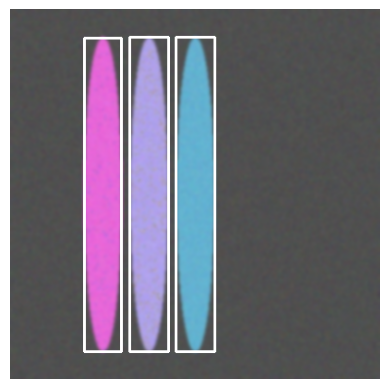

In [8]:
# Test img1
p2img1=cv2.imread('Problem2/img1.jpg')
plt.axis("off")
plt.imshow(findEllipses(p2img1),cmap='gray')


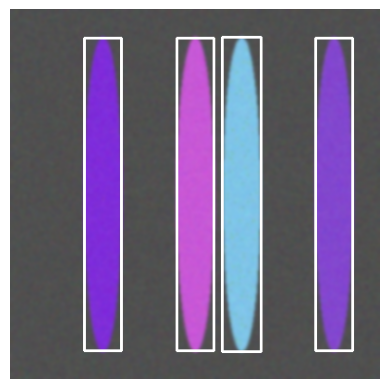

In [9]:
# Test img2
p2img2=cv2.imread('Problem2/img2.jpg')
plt.axis("off")
plt.imshow(findEllipses(p2img2),cmap='gray')

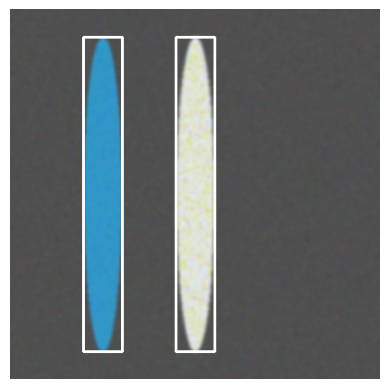

In [10]:
# Test img3
p2img3=cv2.imread('Problem2/img3.jpg')
plt.axis("off")
plt.imshow(findEllipses(p2img3))